## Simple Linear Regression Using Numpy and Scikit-Learn


### Load Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Create random temperature values over some period of days.
With y0=32, delta=random within .5 sigma in normal distribution, and coeff of .1 for linearity.

In [2]:
# Define a function with coefficients
f = np.poly1d([.1, 32])
# x-values
days = np.arange(30)
# create noise
mu, sigma = 0, .5
delta = np.random.normal(scale=.5, size=days.shape[0])
# y-values
temps = f(days) + delta

Plot the values.

Text(0.5,0,'Day')

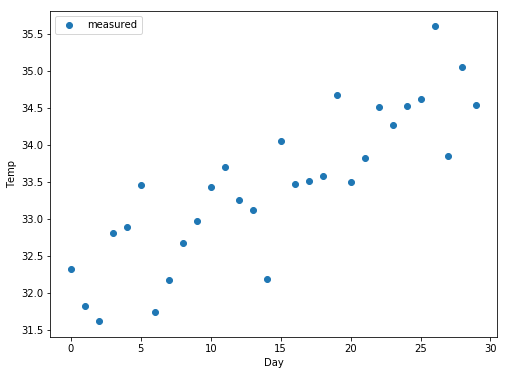

In [3]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(days, temps, label='measured')
ax.legend()
ax.set_ylabel('Temp')
ax.set_xlabel('Day')

## Using Numpy's Polyfit for Linear Fitting
The polyfit returns the slope and y-intercept of the line. <br>
These are the varibles needed to plot a line: <br>
*y = mx+b <br>
where, m is the slope <br>
       x is the x values <br>
       y is the y values*

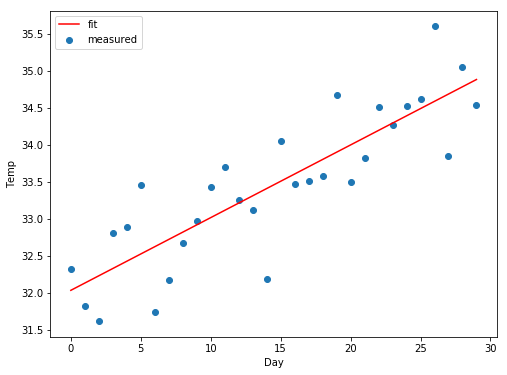

In [4]:
slope, intercept = np.polyfit(days, temps, deg=1) # set deg 1 for linear.
# calculate fitted line
fit = intercept + slope*days

# Plot fitted line
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(days, temps, label='measured')
ax.plot(days, fit, 'r-', label='fit')
ax.set_ylabel('Temp')
ax.set_xlabel('Day')
plt.legend()
plt.show()

## Calculating the Error
In linear regression model it is important to define the error

## Fitting with Scikit-Learn
Scikit-Learn has a linear regression model too for fitting.

In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
regression = lr.fit(X=days.reshape(-1, 1), y=temps.reshape(-1, 1))
regression.intercept_, regression.coef_

(array([32.04099649]), array([[0.09818594]]))

In [6]:
# Calculate Fitted line
fit2 = regression.intercept_ + regression.coef_*days

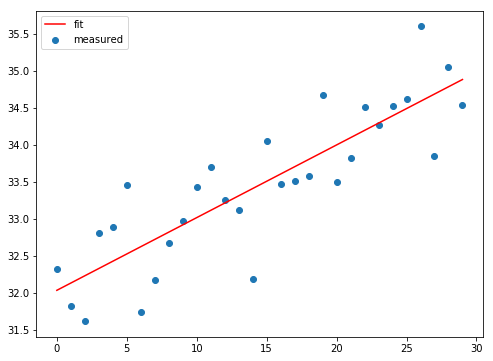

In [7]:
# Plot fitted line
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(days, temps, label='measured')
ax.plot(days.ravel(), fit2.ravel(), 'r-', label='fit')
plt.legend()
plt.show()

## Predict
Predict some temperature values in x days in the future.

In [8]:
pred = regression.predict(np.array([[5], [15]]))
pred

array([[32.53192618],
       [33.51378554]])

## Computational Speed

In [9]:
def leastsq1(x, y):
    a = np.vstack([x, np.ones(len(x))]).T
    return np.dot(np.linalg.inv(np.dot(a.T, a)), np.dot(a.T, y))

def leastsq2(x, y):
    a = np.vstack([x, np.ones(len(x))]).T
    return np.linalg.lstsq(np.vstack([x, np.ones(len(x))]).T, y)[0]

def leastsq3(x, y):
    return np.polyfit(x, y, 1)

def leastsq4(x, y):
    lr = LinearRegression()
    regression = lr.fit(X=x.reshape(-1, 1), y=y.reshape(-1, 1))
    return np.concatenate([regression.coef_.ravel(), regression.intercept_.ravel()])

In [10]:
%timeit leastsq1(days, temps)

55.3 µs ± 1.12 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [11]:
%timeit leastsq2(days, temps)

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys


41.2 µs ± 1.56 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [12]:
%timeit leastsq3(days, temps)

61.2 µs ± 1.33 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [13]:
%timeit leastsq4(days, temps)

257 µs ± 28.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
